<a href="https://colab.research.google.com/github/fredericmenezes/EDA-Airbnb-Rio-de-Janeiro-Project/blob/main/eda_airbnb_rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an insights project in which, through exploratory data analysis, the aim is to generate insights and recommend solutions to the business problem at hand.

To this end, the dataset used pertains to various types of accommodations offered through Airbnb in the city of Rio de Janeiro.

According to their own website, Airbnb "began in 2008 when two designers with extra space hosted three travelers looking for a place to stay. Now, millions of hosts and travelers choose to create a free Airbnb account so they can list their space and book unique accommodations, anywhere in the world. Additionally, Airbnb Experience hosts share their passions and interests with travelers and locals alike. Airbnb makes sharing easy, enjoyable, and safe. We verify personal profiles and listings, maintain a smart messaging system so hosts and guests can communicate with confidence, and manage a trusted platform for collecting and transferring payments."

In other words, Airbnb is an online service that makes it easier for people to book and rent accommodations in a safer and more direct manner between hosts and guests. It can encompass different types of accommodations, where often the prices are lower than those of hotels and properties booked through other means.

Source: [Airbnb](https://www.airbnb.com/help/article/2503)

In light of this, pertinent inquiries were formulated to guide the business problem. Therefore, by applying exploratory data analysis, the aim is to address the following questions:

1. What are the most offered types of accommodations and which ones have the highest revenue?

2. What are the Top 10 most expensive and cheapest accommodations?

3. Which neighborhoods have the highest number of accommodations and which ones have the highest total revenue?

4. What is the most popular price range, and which one generates the highest revenue?

5. Do Superhosts, Verified Hosts, and Hosts with the highest number of listings generate higher total revenue?

6. How does price behavior vary with the number of bathrooms, bedrooms, beds, and different types of rooms and beds?

7. Do accommodations with a higher number of reviews, guest capacity, and included guests have advantages in total revenue?

8. Do accommodations with instant booking feature yield higher gains? What is the most commonly offered length of stay?

9. What is the proportion of accommodations that offer extra guest services, and what is the average price?

10. What factors have the most influence on price?

By addressing these questions, the project can generate insights for investors, hosts, and travelers.

# Importing libraries and the dataset

In [2]:
!wget -P input https://raw.githubusercontent.com/fredericmenezes/EDA-Airbnb-Rio-de-Janeiro-Project/main/input/listings.csv

--2023-09-17 11:31:17--  https://raw.githubusercontent.com/fredericmenezes/EDA-Airbnb-Rio-de-Janeiro-Project/main/input/listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73031461 (70M) [text/plain]
Saving to: ‘input/listings.csv’

listings.csv        100%[===================>]  69.65M   171MB/s    in 0.4s    

2023-09-17 11:31:19 (171 MB/s) - ‘input/listings.csv’ saved [73031461/73031461]



In [3]:
# Input data files are available in the "./input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/listings.csv


In [4]:
# View Settings
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
import folium
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Dataset visualization settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

The dataset used was listings

In [5]:
# Loading data into csv file

df_l = pd.read_csv('./input/listings.csv')

# Data Exploration

In [6]:
# First lines of the Dataset
df_l.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3123306,https://www.airbnb.com/rooms/3123306,20230626155752,2023-06-26,previous scrape,Home in Rio · 2 bedrooms · 2 beds · 1 bath,apartamento espaçoso com varanda e vista panorâmica para o mar de ipanema. wifi . tv ...,vizinhança muito hospitaleira e festiva,https://a0.muscache.com/pictures/39851024/a51ce65d_original.jpg,15864313,https://www.airbnb.com/users/show/15864313,José Mario,2014-05-22,"Rio, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/15864313/profile_pic/1400787988/original.jpg?aki_poli...,https://a0.muscache.com/im/users/15864313/profile_pic/1400787988/original.jpg?aki_poli...,Vidigal,1.0,1.0,"['email', 'phone']",t,f,"Rio, Rio de Janeiro, Brazil",Vidigal,NaN,-22.99298,-43.23910,Entire home,Entire home/apt,6,NaN,1 bath,2.0,2.0,[],$800.00,10,30,10,10,30,30,10.0,30.0,NaN,f,0,0,0,0,2023-06-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,912633,https://www.airbnb.com/rooms/912633,20230626155752,2023-06-26,previous scrape,Home in Rio de Janeiro · 1 bedroom · 2 beds · 1 shared bath,<b>The space</b><br />Come have fun with Carnival Carioca <br />And be dazzled by the ...,NaN,https://a0.muscache.com/pictures/13482859/f724b2a1_original.jpg,4897168,https://www.airbnb.com/users/show/4897168,Taryhk,2013-01-29,"Rio de Janeiro, Brazil","Meu nome é Taryhk.\r\nSou bailarino e músico. Trabalho com forró, Dança Contemporanea...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/4897168/profile_pic/1359493287/original.jpg?aki_polic...,https://a0.muscache.com/im/users/4897168/profile_pic/1359493287/original.jpg?aki_polic...,NaN,1.0,2.0,"['email', 'phone']",t,f,NaN,Rio Comprido,NaN,-22.92466,-43.20748,Shared room in home,Shared room,4,NaN,1 shared bath,NaN,2.0,"[""TV with standard cable"", ""Breakfast"", ""Air conditioning"", ""Kitchen"", ""Wifi"", ""Washer""]",$407.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,f,0,0,0,0,2023-06-26,1,0,0,2013-02-15,2013-02-15,5.0,5.0,4.0,5.0,5.0,4.0,5.0,NaN,f,1,0,0,1,0.01
2,29051942,https://www.airbnb.com/rooms/29051942,20230626155752,2023-06-27,city scrape,Rental unit in Ipanema · Studio · 1 bed · 1 bath,Central location ipanema <br />Walking distance to Leblon<br />Low season rates,NaN,https://a0.muscache.com/pictures/ce7ceee5-25a5-4ac8-a6a1-6f49fe42c26e.jpg,4307081,https://www.airbnb.com/users/show/4307081,Nereu A,2012-12-02,"Rio de Janeiro, Brazil","30 anos de experiencia na area de turismo, idiomas ingles, espanhol e portugues",within an hour,98%,28%,t,https://a0.muscache.com/im/pictures/user/6c5b1dec-21b3-4fdf-abc8-787d2fa9bde4.jpg?aki_...,https://a0.muscache.com/im/pictures/user/6c5b1dec-21b3-4fdf-abc8-787d2fa9bde4.jpg?aki_...,Ipanema,56.0,85.0,['phone'],t,t,NaN,Ipanema,NaN,-

In [7]:
# Number of rows and columns in the Dataset
df_l.shape

(31401, 75)

In [8]:
# Dataframe Columns
df_l.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
   

In [9]:
# Dataset data types
df_l.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [10]:
# Frequency of data types
df_l.dtypes.value_counts()

object     34
int64      21
float64    20
dtype: int64

In [11]:
# Unique values in each column
df_l.nunique()

id                                              31401
listing_url                                     31401
scrape_id                                           1
last_scraped                                        4
source                                              2
name                                            13864
description                                     28981
neighborhood_overview                           14590
picture_url                                     30759
host_id                                         19472
host_url                                        19472
host_name                                        5733
host_since                                       4210
host_location                                     547
host_about                                       7708
host_response_time                                  4
host_response_rate                                 82
host_acceptance_rate                               97
host_is_superhost           

In [12]:
# Duplicate fields
df_l.duplicated().sum()

0

In [13]:
# Statistical description of the entire Dataset including categorical columns
df_l.describe(include=['O']).T

,count,unique,top,freq
listing_url,31401,31401,https://www.airbnb.com/rooms/3123306,1
last_scraped,31401,4,2023-06-27,18447
source,31401,2,city scrape,28106
name,31401,13864,Rental unit in Rio de Janeiro · 1 bedroom · 1 bed · 1 bath,942
description,30694,28981,Relaxe com toda a família nesta acomodação tranquila.,163
neighborhood_overview,16339,14590,Copacabana,79
picture_url,31401,30759,https://a0.muscache.com/pictures/miso/Hosting-738210336601338645/original/925204ba-407...,20
host_url,31401,19472,https://www.airbnb.com/users/show/341887136,225
host_name,31398,5733,Daniel,321
host_since,31398,4210,2020-03-17,226


In [14]:
# Statistical description of the Dataset's numeric columns only
df_l.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.140100e+04,3.140100e+04,3.140100e+04,31398.000000,31398.000000,0.0,31401.000000,31401.000000,31401.000000,0.0,24026.000000,31206.000000,31401.000000,31401.000000,31401.000000,31401.000000,31401.000000,31401.000000,31401.000000,31401.000000,0.0,31401.000000,31401.000000,31401.000000,31401.000000,31401.000000,31401.000000,31401.000000,23527.000000,23367.000000,23368.000000,23368.000000,23367.000000,23366.000000,23367.000000,0.0,31401.000000,31401.000000,31401.000000,31401.000000,23527.000000
mean,3.174587e+17,2.023063e+13,1.614376e+08,20.483215,32.099306,NaN,-22.967407,-43.250975,4.055635,NaN,1.798427,2.506633,4.680583,513.334480,4.453903,5.262953,627.799815,649.204802,4.648635,641.826668,NaN,17.844400,38.818796,60.684978,199.741537,19.083978,7.034171,0.523805,4.740213,4.794960,4.726143,4.875752,4.859695,4.856934,4.683960,NaN,9.878507,9.082927,0.693831,0.091175,0.955199
std,3.796650e+17,0.000000e+00,1.641660e+08,111.135079,152.793972,NaN,0.035279,0.100136,2.373539,NaN,1.072614,2.141091,23.398843,536.952445,20.327143,23.072797,552.450226,549.441663,20.409025,547.716065,NaN,12.279074,23.338205,33.991210,135.525941,39.615992,11.247302,1.075560,0.572546,0.413306,0.467217,0.338911,0.363869,0.337112,0.462731,NaN,28.305339,28.230978,1.715966,0.780535,1.079195
min,1.787800e+04,2.023063e+13,1.671000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.060518e+07,2.023063e+13,2.185314e+07,1.000000,1.000000,NaN,-22.984816,-43.309504,2.000000,NaN,1.000000,1.000000,1.000000,60.000000,1.000000,2.000000,90.000000,90.000000,2.000000,90.000000,NaN,3.000000,18.000000,34.000000,83.000000,0.000000,0.000000,0.000000,4.710000,4.750000,4.660000,4.880000,4.860000,4.850000,4.600000,NaN,1.000000,1.000000,0.000000,0.000000,0.200000
50%,5.070736e+07,2.023063e+13,8.527476e+07,2.000000,3.000000,NaN,-22.972830,-43.195830,4.000000,NaN,2.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.100000,365.000000,NaN,23.000000,51.000000,79.000000,179.000000,4.000000,2.000000,0.000000,4.910000,4.930000,4.880000,5.000000,5.000000,4.980000,4.800000,NaN,2.000000,1.000000,0.000000,0.000000,0.560000
75%,7.479088e+17,2.023063e+13,2.925903e+08,5.000000,8.000000,NaN,-22.955620,-43.185960,5.000000,NaN,2.000000,3.000000,3.000000,1125.000000,3.000000,5.000000,1125.000000,1125.000000,3.400000,1125.000000,NaN,29.000000,59.000000,89.000000,357.000000,18.000000,9.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,3.000000,1.000000,0.000000,1.340000
max,9.220117e+17,2.023063e+13,5.219198e+08,1248.000000,1601.000000,NaN,-22.749690,-43.104400,16.000000,NaN,26.000000,91.000000,1125.000000,47036.000000,1125.000000,1125.000000,47036.000000,47036.000000,1125.000000,47036.000000,NaN,30.000000,60.000000,90.000000,365.000000,603.000000,143.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,225.000000,225.00

In [15]:
# Null values in the Dataset
df_l.isnull().sum().sort_values(ascending=False)

license                                         31401
neighbourhood_group_cleansed                    31401
bathrooms                                       31401
calendar_updated                                31401
host_about                                      15705
neighbourhood                                   15062
neighborhood_overview                           15062
host_neighbourhood                               8423
host_response_rate                               8325
host_response_time                               8325
review_scores_location                           8035
review_scores_value                              8034
review_scores_communication                      8034
review_scores_accuracy                           8034
review_scores_checkin                            8033
review_scores_cleanliness                        8033
reviews_per_month                                7874
first_review                                     7874
last_review                 

In [16]:
# Null values in the Dataset in terms of percentage
df_l.isnull().sum()/df_l.shape[0] * 100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.000000
description                                       2.251521
neighborhood_overview                            47.966625
picture_url                                       0.000000
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.009554
host_since                                        0.009554
host_location                                    19.461164
host_about                                       50.014331
host_response_time                               26.511895
host_response_rate                               26.5118

# Data Cleansing

Null values

In [17]:
# Columns with less than 10% null values
df_l.isnull().sum()/df_l.shape[0] * 100 < 10

id                                               True
listing_url                                      True
scrape_id                                        True
last_scraped                                     True
source                                           True
name                                             True
description                                      True
neighborhood_overview                           False
picture_url                                      True
host_id                                          True
host_url                                         True
host_name                                        True
host_since                                       True
host_location                                   False
host_about                                      False
host_response_time                              False
host_response_rate                              False
host_acceptance_rate                            False
host_is_superhost           

NOTE: With this, we will exclude columns that contain more than 10% of null values:

In [18]:
# Maximum value of nulls allowed
max_nulo = 31401 * 10 / 100 # 31401 is the number of rows in the dataset
max_nulo

3140.1

In [19]:
# Remove all columns that have more than 10% null values
max_nulo = 3140.1
df_l = df_l.loc[:, (df_l.isnull().sum(axis=0) < max_nulo)]
df_l.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3123306,https://www.airbnb.com/rooms/3123306,20230626155752,2023-06-26,previous scrape,Home in Rio · 2 bedrooms · 2 beds · 1 bath,apartamento espaçoso com varanda e vista panorâmica para o mar de ipanema. wifi . tv ...,https://a0.muscache.com/pictures/39851024/a51ce65d_original.jpg,15864313,https://www.airbnb.com/users/show/15864313,José Mario,2014-05-22,https://a0.muscache.com/im/users/15864313/profile_pic/1400787988/original.jpg?aki_poli...,https://a0.muscache.com/im/users/15864313/profile_pic/1400787988/original.jpg?aki_poli...,1.0,1.0,"['email', 'phone']",t,f,Vidigal,-22.99298,-43.23910,Entire home,Entire home/apt,6,1 bath,2.0,[],$800.00,10,30,10,10,30,30,10.0,30.0,f,0,0,0,0,2023-06-26,0,0,0,f,1,1,0,0
1,912633,https://www.airbnb.com/rooms/912633,20230626155752,2023-06-26,previous scrape,Home in Rio de Janeiro · 1 bedroom · 2 beds · 1 shared bath,<b>The space</b><br />Come have fun with Carnival Carioca <br />And be dazzled by the ...,https://a0.muscache.com/pictures/13482859/f724b2a1_original.jpg,4897168,https://www.airbnb.com/users/show/4897168,Taryhk,2013-01-29,https://a0.muscache.com/im/users/4897168/profile_pic/1359493287/original.jpg?aki_polic...,https://a0.muscache.com/im/users/4897168/profile_pic/1359493287/original.jpg?aki_polic...,1.0,2.0,"['email', 'phone']",t,f,Rio Comprido,-22.92466,-43.20748,Shared room in home,Shared room,4,1 shared bath,2.0,"[""TV with standard cable"", ""Breakfast"", ""Air conditioning"", ""Kitchen"", ""Wifi"", ""Washer""]",$407.00,1,1125,1,1,1125,1125,1.0,1125.0,f,0,0,0,0,2023-06-26,1,0,0,f,1,0,0,1


In [20]:
# Dataset size after columns are deleted
df_l.shape

(31401, 51)

In [21]:
# Remaining columns
df_l.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable',
       'calculated_host_listings_coun

In [22]:
# Null values columns
df_l.isnull().sum().sort_values(ascending=False)

description                                     707
beds                                            195
bathrooms_text                                   32
host_name                                         3
host_identity_verified                            3
host_has_profile_pic                              3
host_listings_count                               3
host_picture_url                                  3
host_thumbnail_url                                3
host_since                                        3
host_total_listings_count                         3
number_of_reviews                                 0
availability_60                                   0
minimum_maximum_nights                            0
maximum_maximum_nights                            0
calculated_host_listings_count_private_rooms      0
minimum_nights_avg_ntm                            0
maximum_nights_avg_ntm                            0
has_availability                                  0
availability

## Selection of trivial columns for business

Exclude all columns that are initially assumed to be irrelevant to the business question by reading the data dictionary found on the website: [http://insideairbnb.com/](http://insideairbnb.com/rio-de-janeiro)

In [23]:
# Delete all columns except these.
df_l = df_l.drop(df_l.columns.difference(['id', 'name', 'host_id','host_is_superhost', 'host_identity_verified',
                                          'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
                                          'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                                          'price', 'guests_included', 'extra_people', 'minimum_nights',
                                          'number_of_reviews', 'instant_bookable', 'calculated_host_listings_count'
                                         ]), 1)

In [24]:
# Check changes
df_l.head(5)

,id,name,host_id,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,instant_bookable,calculated_host_listings_count
0,3123306,Home in Rio · 2 bedrooms · 2 beds · 1 bath,15864313,f,Vidigal,-22.99298,-43.23910,Entire home,Entire home/apt,6,2.0,$800.00,10,0,f,1
1,912633,Home in Rio de Janeiro · 1 bedroom · 2 beds · 1 shared bath,4897168,f,Rio Comprido,-22.92466,-43.20748,Shared room in home,Shared room,4,2.0,$407.00,1,1,f,1
2,29051942,Rental unit in Ipanema · Studio · 1 bed · 1 bath,4307081,t,Ipanema,-22.98341,-43.21470,Entire rental unit,Entire home/apt,3,1.0,$334.00,3,1,f,52
3,52279209,Rental unit in Botafogo · ★3.33 · 1 bedroom · 1 bed · 1 bath,172482654,t,Botafogo,-22.94617,-43.18323,Entire rental unit,Entire home/apt,2,1.0,$130.00,20,3,f,14
4,13561531,Rental unit in Rio de Janeiro · 3 bedrooms · 3 beds · 2 baths,69583438,f,Barra da Tijuca,-23.00598,-43.32170,Entire rental unit,Entire home/apt,6,3.0,"$6,222.00",1,0,f,1


In [25]:
# Dataset size after changes
df_l.shape

(31401, 16)

In [26]:
# Leftover null values
df_l.isnull().sum().sort_values(ascending=False)

beds                              195
host_identity_verified              3
id                                  0
name                                0
host_id                             0
neighbourhood_cleansed              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
price                               0
minimum_nights                      0
number_of_reviews                   0
instant_bookable                    0
calculated_host_listings_count      0
dtype: int64

Replace null values with the median in numerical variables and with the mode in categorical variables. **NOTE**: we chose the median instead of the average in order to avoid outliers.

In [27]:
# Listing categorical and numeric columns:
v_c = list(df_l.select_dtypes(include=['object']).columns)
v_n = list(df_l.select_dtypes(include=['float64', 'int64']).columns)
print('Categorical Variables:', v_c)
print('Numeric Variables:', v_n)

Categorical Variables: ['name', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'price', 'instant_bookable']
Numeric Variables: ['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'beds', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']


In [28]:
# Replace null values with mode in 'host_identity_verified' column
moda_host_identity_verified  = sts.mode(df_l['host_identity_verified'])
moda_host_identity_verified
df_l['host_identity_verified'].fillna(moda_host_identity_verified , inplace=True)

In [29]:
# Checks if there are still null values in the 'host_identity_verified' column
df_l['host_identity_verified'].isnull().sum()

0

In [30]:
# Leftover null values
df_l.isnull().sum().sort_values(ascending=False)

beds                              195
id                                  0
name                                0
host_id                             0
host_identity_verified              0
neighbourhood_cleansed              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
price                               0
minimum_nights                      0
number_of_reviews                   0
instant_bookable                    0
calculated_host_listings_count      0
dtype: int64

Delete all remaining null values as this is very specific information and it is not appropriate to replace it.

In [31]:
# Delete all rows that contain null values
df_l = df_l.dropna()
df_l.head(6)

,id,name,host_id,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,instant_bookable,calculated_host_listings_count
0,3123306,Home in Rio · 2 bedrooms · 2 beds · 1 bath,15864313,f,Vidigal,-22.99298,-43.23910,Entire home,Entire home/apt,6,2.0,$800.00,10,0,f,1
1,912633,Home in Rio de Janeiro · 1 bedroom · 2 beds · 1 shared bath,4897168,f,Rio Comprido,-22.92466,-43.20748,Shared room in home,Shared room,4,2.0,$407.00,1,1,f,1
2,29051942,Rental unit in Ipanema · Studio · 1 bed · 1 bath,4307081,t,Ipanema,-22.98341,-43.21470,Entire rental unit,Entire home/apt,3,1.0,$334.00,3,1,f,52
3,52279209,Rental unit in Botafogo · ★3.33 · 1 bedroom · 1 bed · 1 bath,172482654,t,Botafogo,-22.94617,-43.18323,Entire rental unit,Entire home/apt,2,1.0,$130.00,20,3,f,14
4,13561531,Rental unit in Rio de Janeiro · 3 bedrooms · 3 beds · 2 baths,69583438,f,Barra da Tijuca,-23.00598,-43.32170,Entire rental unit,Entire home/apt,6,3.0,"$6,222.00",1,0,f,1
5,45636008,Condo in Campo Grande · Studio · 4 beds · 0 baths,199934701,t,Guaratiba,-22.95318,-43.57231,Entire condo,Entire home/apt,1,4.0,$140.00,2,0,f,1


In [32]:
# Check if there are still null values
df_l.isnull().sum().sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
beds                              0
price                             0
minimum_nights                    0
number_of_reviews                 0
instant_bookable                  0
calculated_host_listings_count    0
dtype: int64

In [33]:
# Number of rows and columns in the Dataset after changes
df_l.shape

(31206, 16)

In [34]:
# Remaining columns
df_l.columns

Index(['id', 'name', 'host_id', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'beds', 'price', 'minimum_nights',
       'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count'],
      dtype='object')

## Outliers

In [35]:
# Brief statistical description of quantitative data
df_l.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31206.0,3.187550e+17,3.799154e+17,17878.000000,2.051588e+07,5.092624e+07,7.498427e+17,9.220117e+17
host_id,31206.0,1.614024e+08,1.642413e+08,1671.000000,2.185199e+07,8.519854e+07,2.925903e+08,5.219198e+08
latitude,31206.0,-2.296744e+01,3.524498e-02,-23.073276,-2.298481e+01,-2.297283e+01,-2.295580e+01,-2.274969e+01
longitude,31206.0,-4.325092e+01,1.001649e-01,-43.723009,-4.330941e+01,-4.319578e+01,-4.318595e+01,-4.310440e+01
accommodates,31206.0,4.057681e+00,2.364347e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01
beds,31206.0,2.506633e+00,2.141091e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,9.100000e+01
minimum_nights,31206.0,4.662757e+00,2.331473e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.125000e+03
number_of_reviews,31206.0,1.913808e+01,3.967740e+01,0.000000,1.000000e+00,4.000000e+00,1.900000e+01,6.030000e+02
calculated_host_listings_count,31206.0,9.878837e+00,2.835526e+01,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,2.250000e+02


In [36]:
# General information about columns
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31206 entries, 0 to 31400
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31206 non-null  int64  
 1   name                            31206 non-null  object 
 2   host_id                         31206 non-null  int64  
 3   host_identity_verified          31206 non-null  object 
 4   neighbourhood_cleansed          31206 non-null  object 
 5   latitude                        31206 non-null  float64
 6   longitude                       31206 non-null  float64
 7   property_type                   31206 non-null  object 
 8   room_type                       31206 non-null  object 
 9   accommodates                    31206 non-null  int64  
 10  beds                            31206 non-null  float64
 11  price                           31206 non-null  object 
 12  minimum_nights                  

The numeric column "price" does not appear as it is in object format. Let's transform it to the float type.

In [38]:
# Remove the $ symbol from the 'price' column and transform it into a float
df_l['price'] = df_l['price'].astype(str).str.replace("$", "").str.replace(',', '', regex = 'true').astype(float)

**NOTE**: Transform the "beds" columns into integers

In [39]:
# Conversion to integer in the "beds" column
df_l['beds'] = df_l['beds'].astype(int)

In [40]:
# Check changes applied to columns
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31206 entries, 0 to 31400
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31206 non-null  int64  
 1   name                            31206 non-null  object 
 2   host_id                         31206 non-null  int64  
 3   host_identity_verified          31206 non-null  object 
 4   neighbourhood_cleansed          31206 non-null  object 
 5   latitude                        31206 non-null  float64
 6   longitude                       31206 non-null  float64
 7   property_type                   31206 non-null  object 
 8   room_type                       31206 non-null  object 
 9   accommodates                    31206 non-null  int64  
 10  beds                            31206 non-null  int64  
 11  price                           31206 non-null  float64
 12  minimum_nights                  

In [41]:
# Brief statistical description of numeric columns
df_l.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31206.0,3.187550e+17,3.799154e+17,17878.000000,2.051588e+07,5.092624e+07,7.498427e+17,9.220117e+17
host_id,31206.0,1.614024e+08,1.642413e+08,1671.000000,2.185199e+07,8.519854e+07,2.925903e+08,5.219198e+08
latitude,31206.0,-2.296744e+01,3.524498e-02,-23.073276,-2.298481e+01,-2.297283e+01,-2.295580e+01,-2.274969e+01
longitude,31206.0,-4.325092e+01,1.001649e-01,-43.723009,-4.330941e+01,-4.319578e+01,-4.318595e+01,-4.310440e+01
accommodates,31206.0,4.057681e+00,2.364347e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01
beds,31206.0,2.506633e+00,2.141091e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,9.100000e+01
price,31206.0,8.537591e+02,7.307011e+03,33.000000,1.900000e+02,3.140000e+02,6.000000e+02,5.476430e+05
minimum_nights,31206.0,4.662757e+00,2.331473e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.125000e+03
number_of_reviews,31206.0,1.913808e+01,3.967740e+01,0.000000,1.000000e+00,4.000000e+00,1.900000e+01,6.030000e+02
calculated_host_listings_count,31206.0,9.878837e+00,2.835526e+01,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,2.250000e+02


<Figure size 1600x1800 with 0 Axes>

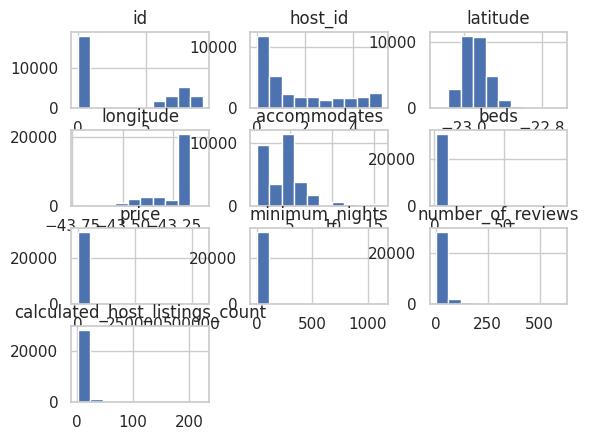

In [42]:
# Histogram of all numeric columns
sns.set(style="whitegrid")
plt.figure(figsize = (16,18))
df_l.hist()
plt.show();

# Data visualization

Due to its trivial relevance to the business question, let's start by analyzing the Price column